In [3]:

%matplotlib widget
import pandas as pd
import numpy as np
import glob,sys,socket,fileinput
import os.path
import matplotlib.pyplot as plt

In [107]:
# Folder es la carpeta en donde estan los .txt que se sacan del monitor del arduino

#if socket.gethostname()

#folder = "C:/Users/Fluidodinamica/Documents/Santiago/Calibracion de balanza"
folder = "Raw Data Calibracion de balanza/"
files = np.sort(glob.glob(folder+'*.txt'))

In [108]:
# en calibrationData va el nombre del archivo que 
calibrationfile = "CalibrationData.txt"
calibrationData=open(calibrationfile,"w")
calibrationData.write('txt,Media Lift,Media Drag,STD Lift,STD Drag\n');

In [109]:
for i in files:
    datos = pd.read_csv(i, sep=",", header=None,skiprows=3)
    datos = datos[:-100]
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    datos=datos[500:5500]
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    calibrationData.write(i.split('Medidas Carga')[1]+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")

In [110]:
calibrationData.close()

In [111]:
A = pd.read_csv(calibrationfile)

In [164]:
valores_masa_drag = np.array([10.85,30.88,51.33,81.38,119.87,149.58])
valores_masa_lift = np.array([10.26,30.29,50.26,80.19,118.86,147.98])
valores_masa_lift = valores_masa_lift[1:]
datos = A.to_numpy()
datos[:,1:] = datos[:,1:].astype(float)
datos[indices_ref]

medialift1,mediadrag1,stdlift1,stddrag1 = datos[1:7][:,1:].T
medialift2,mediadrag2,stdlift2,stddrag2 = datos[7:][:,1:].T
medialift0,mediadrag0,stdlift0,stddrag0 = datos[0][1:].T

P1 = np.polyfit(valores_masa_drag,mediadrag1.astype(float),1)
ajuste_drag = np.poly1d(P1)
P2 = np.polyfit(valores_masa_lift,medialift2.astype(float),1)
ajuste_lift = np.poly1d(P2)


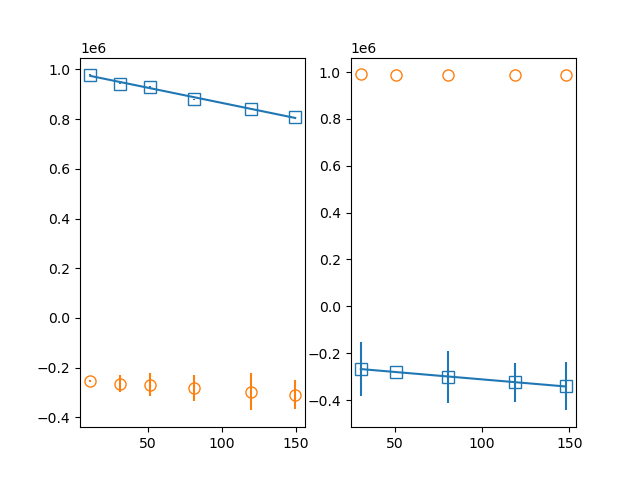

In [174]:
fig,ax =plt.subplots(1,2)
ax,axb = ax


lin = ax.errorbar(valores_masa_drag,mediadrag1,stddrag1,linestyle='',markersize=8,fillstyle='none',marker='s')
ax.errorbar(valores_masa_drag,medialift1,stdlift1,linestyle='',markersize=8,fillstyle='none',marker='o')
ax.plot(valores_masa_drag,ajuste_drag(valores_masa_drag),color=lin[0].get_color())
lin2 = axb.errorbar(valores_masa_lift,medialift2,stdlift2,linestyle='',markersize=8,fillstyle='none',marker='s')
axb.errorbar(valores_masa_lift,mediadrag2,stddrag2,linestyle='',markersize=8,fillstyle='none',marker='o')
axb.plot(valores_masa_lift,ajuste_lift(valores_masa_lift),color=lin2[0].get_color())


In [176]:
P1,P2

(array([ -1220.29665974, 987368.91404836]),
 array([   -631.94497358, -248758.99363938]))

In [177]:
medialift0,mediadrag0,stdlift0,stddrag0

(-249381.0, 988536.0, 49006.0, 364.0)

In [179]:
5*50e-3/1.5e-5

16666.666666666668